### Paquetes usados
- pandas
- re
- numpy
- matplotlib.pyplot

# PREPROCESAMIENTO DE DATOS
Abiendo el archivo *.csv*, vimos que el mismo usaba como separadores el punto y coma (;), en lugar de la coma tradicional (,). Por lo tanto, al leer el archivo (usando la función de pandas `pd.read_csv()`), se debe especificar el separador a utilizar. Para esto agregamos el parámetro `sep=';'` y así vemos que el dataframe se muestra correctamente.

In [1]:
import pandas as pd

# Leemos el archivo .csv con separadores ";" y lo guardamos en una variable
raw_df = pd.read_csv("winequality_BDS.csv", sep=';')

# Mostramos las primeras 5 filas del dataset
raw_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Moscatel,8.1,0.24,0.32,10.5,0.030,34.0,105.0,0.99407,3.11,0.42,11.8,6
1,Moscatel,5.8,0.23,0.20,2.0,0.043,39.0,154.0,0.99226,3.21,0.39,10.2,6
2,Moscatel,7.5,0.33,0.36,2.6,0.051,26.0,126.0,0.99097,3.32,0.53,12.7,6
3,Moscatel,6.6,0.38,0.36,9.2,0.061,42.0,214.0,0.99760,3.31,0.56,9.4,5
4,Moscatel,6.4,0.15,0.29,1.8,0.044,21.0,115.0,0.99166,3.10,0.38,10.2,5


## Informacion de las variables
`raw_df.info()`

### Sobre el conjunto de datos
Este conjunto de datos contiene 3231 muestras de vino obtenidas mediante pruebas fisicoquímicas en la bodega Del Sol, elaboradas a partir de dos tipos de uva.
### Descripción de las variables
- `type`: tipo de uva con la que se elabora el vino.
- `fixed acidity`: cantidad de ácidos no volátiles presentes en el vino, medida en gramos por litro.
- `volatile acidity`: cantidad de ácidos volátiles presentes en el vino, medida en gramos por litro.
- `citric acid`: contenido de ácido cítrico en el vino, medido en gramos por litro.
- `residual sugar`: cantidad de azúcar que queda en el vino después de la fermentación, medida en gramos por litro.
- `chlorides`: concentración de cloruros (sales) en el vino, medida en gramos por litro.
- `free sulfur dioxide`: cantidad de dióxido de azufre que no está ligado químicamente en el vino, medida en miligramos por litro.
- `total sulfur dioxide` : suma del dióxido de azufre libre y el combinado en el vino, medida en miligramos por litro.
- `density`: medida de la masa por unidad de volumen del vino, utilizada para estimar la concentración de sólidos disueltos, medida en gramos por centímetro cúbico.
- `pH`: medida de la acidez o alcalinidad del vino.
- `sulphates`: concentración de sales de sulfato en el vino, medida en gramos por litro.
- `alcohol`: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).
- `quality`: puntuación del vino, con una escala que va de 0 a 10.

In [2]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   object 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.3+ KB


## Pulir datos

Para comenzar a trabajar sobre los datos, antes que nada hacemos una copia del dataframe en crudo. El dataframe sobre el que haremos modificaciones se llamará `df`.

In [110]:
# Creamos un nuevo dataframe para trabajar en él.
df = raw_df.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   object 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.3+ KB


### Columna *'type'*
Esta variable nos muestra la variedad del vino en cuestion. Es una variable cuantitativa nominal y tiene dos varoles posibles: **"Moscatel"** o **"Syrah"**. No tiene valores nulos.

In [4]:
df['type'].value_counts()

type
Moscatel    1632
Syrah       1599
Name: count, dtype: int64

### Columna *'fixed acidity'*
Esta columna refleja la cantidad de acidos no volatiles presentes en el vino, medida en gramos por litro. Es una variable cuantitativa continua.

- `acido no volatil`: aquellos acidos que no se evaporan facilmente y permanecen en el vino durante su almacenamiento y consumo. Contribuyen al sabor (equilibro entre dulzura y acidez), estructura-longevidad (envejecimiento y preservacion) y a definir textura-frescura 

In [36]:
print(df['fixed acidity'].describe())

count    3231.000000
mean        7.414082
std         1.598760
min         3.800000
25%         6.400000
50%         7.000000
75%         8.000000
max        15.900000
Name: fixed acidity, dtype: float64


### Columna *'volatile acidity'*
Esta columna da la cantidad de acidos volatiles presentes en el vino, medida en gramos por litro. Es una variable cuantitativa continua.

- `acido volatil`: (AV) es el conjunto de ácidos grasos de la serie
acética que se hallan en el vino libres o combinados formando sales.
El más importante es el ácido acético.
El olor desagradable a "picado" de algunos vinos es debido principalmente al ácido acético y al acetato de etilo. El nivel sensorial
de estos compuestos es del orden de 0,6 g/L para el ácido acético
y 0,1 g/L para el acetato de etilo. 

*Para mas informacion, visitar:*
- *[Enología - U. de Santiago de Compostela](https://www.usc.gal/caa/MetAnalisisStgo1/enologia.pdf)*
- *[Acidos y acidez en el vino - Aprender de vino](https://www.aprenderdevino.es/acidos-acidez-vino/)*

In [6]:
print(df['volatile acidity'].describe())

count    3231.000000
mean        0.403802
std         0.189421
min         0.085000
25%         0.260000
50%         0.360000
75%         0.530000
max         1.580000
Name: volatile acidity, dtype: float64


### Columna *'citric acid'*
Esta columna muestra la cantidad de acido citrico presente en el vino, medida en gramos por litro. Es una variable cuantitativa continua.
- `acido citrico`: Esta escasamente presente en la uva. Se utiliza tambien como acidificante. En cuanto a su dosis no debe superar la cantidad de 1 g/L (limite juridico europeo) y puede presentarse de 20 a 60 g/L. 

> *Para mas información, visitar:*
>    - *[Acido citrico](https://www.vason.com/uploads/MediaGalleryArticoliDocumenti/%C3%81cido%20C%C3%ADtrico%202_es.pdf)*

In [7]:
print(df['citric acid'].describe())

count    3231.000000
mean        0.288028
std         0.156842
min         0.000000
25%         0.200000
50%         0.280000
75%         0.370000
max         1.000000
Name: citric acid, dtype: float64


### Columna 'residual sugar'
Esta columna da la cantidad de azúcar residual en gramos por litro de vino. Es una variable cuantitativa continua.
- `azucar residual`: La uva contiene, al ser vendimiada (proceso de recolección de la uva cuando está madura para hacer vino), unos 200 gramos de azucares por litro de mosto (El mosto es el jugo fresco de la uva que se obtiene después de su prensado y antes de que comience el proceso de fermentación alcohólica. Al fermentar, el azúcar desaparece en gran parte, quedando lo que los enólogos llaman azucares residuales.
> *Para mas información, visitar:*
>    - *[¿ Sabes lo que es el azucar residual ?](https://www.catadelvino.com/blog-cata-vino/sabes-lo-que-es-el-azucar-residual-de-un-vino)*

In [8]:
print(df['residual sugar'].describe())

count    3231.000000
mean        4.526339
std         4.143991
min         0.700000
25%         1.900000
50%         2.500000
75%         6.100000
max        26.050000
Name: residual sugar, dtype: float64


### Columna *'chlorides'*
- `cloruros`: medidos en miligramos por litro (mg/L). Es una variable cuantitativa continua.
Los cloruros (*"chlorides" por su nombre en ingles*) en el vino pueden afectar el sabor y la calidad del mismo, y también pueden ayudar a determinar su origen y las variedades de uva:

- **Sabor:**
      altas concentraciones de cloruro pueden darle al vino un sabor salado indeseable, lo que puede reducir su atractivo en el mercado. Sin embargo, también se cree que la presencia de cloruro es necesaria para que el sabor salado sea percibido.

- **Origen:**
      La concentración de cloruro en el vino puede verse influenciada por las condiciones geográficas, geológicas y climáticas del viñedo, como su distancia de la costa, el tipo de suelo y si se riega con agua salada.

- **Variedades de uva:**
      El tipo de uva utilizado en el vino puede influir en la cantidad de cloruro que contiene.

- **Restricciones legales:**
      La concentración de cloruro en el vino está regulada por diferentes países. Por ejemplo, el nivel máximo legal de cloruro en el vino terminado es de 606 mg/L.

La concentración de cloruro en el vino varía ampliamente, pero raramente supera los 500 mg/L.

In [9]:
df['chlorides'].describe()

count    3231.000000
mean        0.066149
std         0.041908
min         0.009000
25%         0.042000
50%         0.058000
75%         0.080000
max         0.611000
Name: chlorides, dtype: float64

### Columna *'free sulfur dioxide'*
Esta columna nos indica la cantidad de dióxido de azufre (SO<sub>2</sub>) libre presente en el vino, medido en miligramos por litro (mg/L). Es una variable cuantitativa continua.
- `dioxido de azufre`: Se obtiene por oxidación del azufre donde por una combustión del azufre con el oxígeno genera el dióxido de azufre.
Es considerado como el primer aditivo de uso enológico, el cual desde los comienzos del tiempo de la enología fue muy útil ya que a partir de su uso, se determinaron menos alteraciones durante las etapas de conservación. Esto se explica gracias a la fuerte acción bactericida que tiene, actualmente se lo sigue considerando como algo indispensable en la enología de nuestros días.
En el vino, lo vamos a tener bajo tres formas:
    - anhídrido sulfuro libre
    - anhídrido sulfuroso combinado
    - anhídrido sulfuroso total (que es la suma de los dos anteriores).

El anhídrido sulfuroso libre tiene distintas formas, una de ellas es la forma gaseosa, como dióxido de azufre que es soluble en el agua del vino; el ácido sulfuroso; el anión sulfito ácido que proviene de la disociación del ácido sulfuroso; y también en anión sulfito. 

> *Para mas información, visitar:*
>    - *[El Consejo de Enólogos](http://www.consejodeenologos.com.ar/panel/upload/contenidos/pdf/Microsoft_Word___ANHDRIDO_SULFUROSO_1.pdf)*
>    - *[Vinetur](https://www.vinetur.com/2016011026759/las-propiedades-del-anhidrido-sulfuroso-en-la-elaboracion-del-vino.html)*

In [10]:
df['free sulfur dioxide'].describe()

count    3231.000000
mean       25.649335
std        17.422288
min         1.000000
25%        12.000000
50%        23.000000
75%        35.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

### Columna *'total sulfur dioxide'*
Esta columna nos indica la cantidad total de dióxido de azufre (SO<sub>2</sub>) total presente en el vino, medido en miligramos por litro (mg/L). Es una variable cuantitativa continua.

- `dioxido de azufre total`: está constituido por la suma del anhídrido sulfuroso libre
y el anhídrido sulfuroso combinado.

> *Para mas información, visitar:*
>    - *[El Consejo de Enólogos](http://www.consejodeenologos.com.ar/panel/upload/contenidos/pdf/Microsoft_Word___ANHDRIDO_SULFUROSO_1.pdf)*
>    - *[Vinetur](https://www.vinetur.com/2016011026759/las-propiedades-del-anhidrido-sulfuroso-en-la-elaboracion-del-vino.html)*

In [11]:
df['total sulfur dioxide'].describe()

count    3231.000000
mean       88.349892
std        54.633913
min         6.000000
25%        38.000000
50%        89.000000
75%       127.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

### Columna *'density'*
En esta columna podemos ver la densidad del vino, medida en gramos por centímetro cúbico (g/cm<sup>3</sup>). Es una variable cuantitativa continua.

- `densidad`: La densidad o peso específico del vino es un parámetro analítico de importancia relativa. Si estrujamos uvas y medimos la densidad de ese mosto comprobamos que pesa más que el agua. Un litro de agua pesa 1.000 gramos y un litro de mosto pesa 994 gramos, pero no siempre es lo mismo. Durante la fermentación, que dura unos diez días, la densidad que parte de 1.100, concluye en 994. La diferencia es el tufo que va a la atmósfera.
Pero no todos los vinos acaban su fermentación con la misma densidad, depende de su contenido en alcohol. Si la uva es muy madura tendrá mucho azúcar que formara 14º de alcohol y ese vino tendrá densidad 0,993 que significa que un litro pesará 993 gramos. Por el contrario, si vendimiamos esa uva sin madurar su grado de alcohol será 10º y su densidad de 0,996, lo cual significa que un litro pesa 996 gramos.

*Para mas información, visitar [Densidad del vino - La Rioja](https://www.larioja.com/opinion/densidad-vino-20210611214244-nt.html?ref=https%3A%2F%2Fwww.larioja.com%2Fopinion%2Fdensidad-vino-20210611214244-nt.html).*

In [12]:
df['density'].describe()

count    3231.000000
mean        1.901500
std         8.747779
min         0.987110
25%         0.992550
50%         0.995500
75%         0.997230
max       100.369000
Name: density, dtype: float64

### Columna *'pH'*
Esta columna nos indica el pH del vino. Es una variable cuantitativa continua.

- `pH`: Podemos decir que el pH mide el grado de acidez o de alcalinidad de una disolución obtenida de cualquier elemento o sustancia. Esta unidad de medida se distribuye a lo largo de una escala que va desde el 0 hasta el 14, tomándose el 7 como neutro, siendo los valores más cercanos a 0 los que indican que esa disolución es más ácida y los valores más cercanos a 14 los que indican que esa solución es más alcalina o básica, como también se denomina.
El pH de la mayoría de los vinos se encuentra en el intervalo de 2,8 a 4, lo que lógicamente recae en el lado ácido de la escala. Un vino con un pH de 2,8 es extremadamente ácido mientras que uno con un pH en torno a 4 es plano, carente de acidez.

> *Para mas información, visitar [pH - Aprender de vino](https://www.aprenderdevino.es/ph-y-vino/).*

In [13]:
df['pH'].describe()

count    3231.000000
mean        3.235908
std         0.164921
min         2.740000
25%         3.120000
50%         3.230000
75%         3.340000
max         4.010000
Name: pH, dtype: float64

### Columna *'sulphates'*
Esta columna nos indica la cantidad de sales de sulfato presentes en el vino, medida en gramos por litro. Es una variable cuantitativa continua.
- `sales de sulfato`: sulfatos en vinos son variados y dependen del suelo, del metabolismo de la planta, de su capacidad de absorción y de las prácticas enológicas llevadas a cabo en bodega. 
Segun la fuente citada, las medidas son:
    1. Vinos secos: UN GRAMO POR LITRO (1,00 g/l)
    2. Vinos edulcorados: UNO CON CINCUENTA GRAMOS POR LITRO (1,50 g/l).
    3. Vinos que posean un contenido de azúcares reductores remanentes naturales de fermentación superior a CUATRO GRAMOS POR LITRO (4 g/l): UNO CON CINCUENTA GRAMOS POR LITRO (1,50 g/l).
    4. Con añejamiento mínimo de DOS (2) años en barrica: UNO CON CINCUENTA GRAMOS POR LITRO (1,50 g/l).
    5. Vinos provenientes de procedimientos especiales de elaboración con denuncia previa ante este Instituto para los controles oficiales pertinentes: DOS GRAMOS POR LITRO (2,00 g/l).

*Para mas informacion, visitar [Vinos - Limites Maximos de contenido de cloruros y sulfatos](http://www.allinsa.com/?p=608).).*

In [14]:
df['sulphates'].describe()

count    3231.000000
mean        0.573680
std         0.166353
min         0.230000
25%         0.470000
50%         0.550000
75%         0.650000
max         2.000000
Name: sulphates, dtype: float64

### Columna *'alcohol'*

Podemos ver que la columna 'alcohol' a simple vista consta de numeros reales, sin embargo, está establecida como tipo `string`, entonces procedemos a modificar su formato a tipo `float`, para así poder analizar esta variable de una manera adecuada.

Antes de hacer la transformacion, hacemos un `value_counts()` de la columna para asegurarnos que se trata unicamente de numeros.
Parece ser que encontramos valores erroneos, que tienen varios puntos en lugar de uno único para separar parte entera de decimal.

Para corregir los valores en la columna alcohol y quedarnos solo con la primera aparición del punto decimal, lo hicimos aplicandole una funcion del modulo `re` de expresiones regulares de manera independiente a cada una de las filas con el metodo `apply()`.

Utilizamos lambda como manera de definir la funcion ya que es algo corto que no necesita de la definicion de una funcion tradicional. Dentro de esta, implementamos `re.sub()`: es una función del módulo *re* (expresiones regulares en Python) que busca un patrón en un string y lo reemplaza por otro string.

La sintaxis es `re.sub(pattern, replacement, string)`, donde:
- `pattern`: el patrón de la expresión regular que se quiere buscar.
> En este caso usamos `r'(\.\d+)\.'`
>
> 1. **`r''` (Raw String Literal):**
>    - El prefijo `r` indica que el string es un "raw string" (cadena cruda), lo que significa que las barras invertidas `\` son tratadas literalmente y no como caracteres de escape.
>
> 2. **`(\.\d+)`:**
>   - **`\.`**: Escapa el punto `.` para buscarlo literalmente, ya que en regex `.` representa cualquier carácter. Aquí busca el primer punto en la cadena.
>    - **`\d+`**: Representa uno o más dígitos (`0-9`) que siguen al punto.
>    - **`(\.\d+)`**: Captura el primer punto y los números que lo siguen como un grupo.
>
> 3. **`\.` (después del grupo):**
>    - Este busca un punto adicional inmediatamente después de los números capturados en el grupo anterior.
- `replacement`: el texto con el que se reemplaza el patrón encontrado.
> Este reemplazo en este caso lo hacemos con la expresion regular `(r'\1')`: `\1` se refiere al primer grupo capturado, es decir, el primer punto y los números que lo siguen, pero no incluye el segundo punto. Así, solo se conserva el primer punto y los dígitos.
- `string`: el string sobre el cual se realiza la búsqueda y reemplazo.

Finalmente, pasamos los valores a tipo numerico con el metodo `to_numeric()` de pandas.

In [119]:
import re  # Importamos el paquete re de expresiones regulares en python

# Vemos los valores erroneos
print(df['alcohol'].value_counts())

# Reemplazar todos los puntos después del primero en cada valor de la columna 'alcohol'
df['alcohol'] = df['alcohol'].apply(lambda x: re.sub(r'(\.\d+)\.', r'\1', x))

alcohol
9.5                  200
9.4                  170
9.2                  131
11                   120
9.8                  117
                    ... 
9.95                   1
923.333333.333333      1
9.25                   1
9.05                   1
10.75                  1
Name: count, Length: 110, dtype: int64


In [120]:
### Separamos la celula de codigo en dos para evitar errores de ejecución.

# Convertir los valores corregidos a tipo numérico
df['alcohol'] = pd.to_numeric(df['alcohol'])

print("\nAhora con los valores corregidos:\n", df['alcohol'].value_counts())

print("\nVemos los tipos de datos corregidos:")
df.info()


Ahora con los valores corregidos:
 alcohol
9.500000      200
9.400000      170
9.200000      131
11.000000     120
9.800000      117
             ... 
9.950000        1
923.333333      1
9.250000        1
9.050000        1
10.750000       1
Name: count, Length: 110, dtype: int64

Vemos los tipos de datos corregidos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   object 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH      

- `alcohol`: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).Este rasgo de los vinos está regulado por una normativa específica que establece ciertos limites al respecto, concretamente a cargo de la Organización Internacional del Vino (OIV) y del comité regulador de cada Denominación de Origen (DO). No obstante, y de una forma generalizada, los vinos no suelen exceder los 15% vol. o 15 grados de alcohol, debido a que es lo máximo que alcanzan durante la fermentación.

*Para mas informacion, visitar [¿ Que es la graduacion alcoholica del vino ? ](https://www.debuenavid.es/blog/elaboracion-del-vino/graduacion-alcoholica-vino#%C2%BFQue_es_la_graduacion_alcoholica_del_vino).).*


In [79]:
#Ahora si hagamos un describe de la columna alcohol.

df['alcohol'].describe()

count    3231.000000
mean       13.983321
std        48.057856
min         8.400000
25%         9.550000
50%        10.500000
75%        11.500000
max       973.333333
Name: alcohol, dtype: float64

### Correccion de valores de 'alcohol'
Como pudimos ver en la descripcion de los valores de la variable 'alcohol', hay valores que se encuentran por encima del 100%. Esto es imposible, ya que el alcohol en el vino no puede superar el 100%. Por lo tanto, procedemos a corregir estos valores, eliminando las filas en las que superen el 100%.

count    3191.000000
mean       10.630809
std         1.212548
min         8.400000
25%         9.500000
50%        10.500000
75%        11.400000
max        14.900000
Name: alcohol, dtype: float64


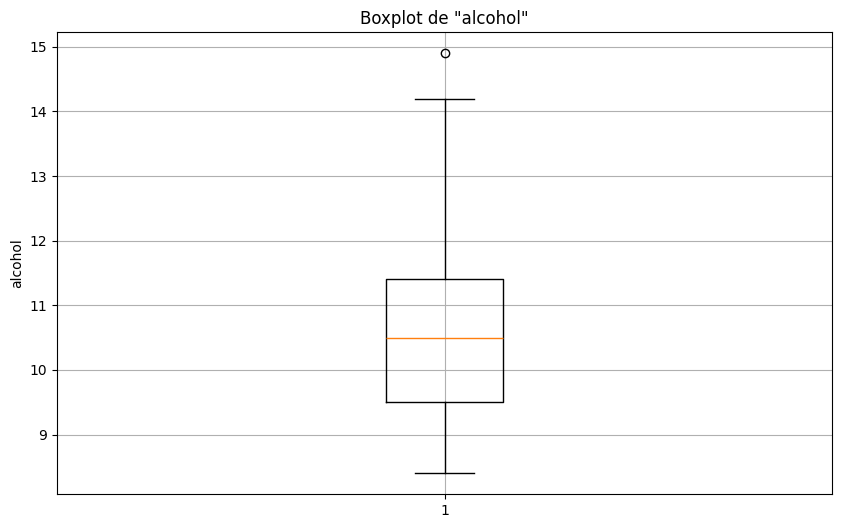

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Eliminar las filas donde el valor de 'alcohol' supere los 100
df = df[df['alcohol'] < 100]

# Restablecer los índices del DataFrame
df.reset_index(drop=True, inplace=True)

print(df['alcohol'].describe())

# Suponiendo que df es tu DataFrame y tiene una columna llamada 'alcohol'
plt.figure(figsize=(10, 6))
plt.boxplot(df['alcohol'])
plt.title('Boxplot de "alcohol"')
plt.ylabel('alcohol')

# Añadir la grilla
plt.grid(True)

# Mostrar el gráfico
plt.show()


### Columna *'quality'*
Esta columna nos indica la calidad del vino, con una escala que va de 0 a 10. Es una variable cuantitativa discreta.

In [9]:
df['quality'].describe()

count    3231.000000
mean        5.785825
std         0.829374
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

## Descripcion de las variables numericas
`describe()` del dataframe.

In [128]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000,3191.000000
mean,7.425008,0.404643,0.287972,4.520385,0.066371,25.528048,87.897681,1.912888,3.236312,0.574011,10.630809,5.782827
std,1.598464,0.189654,0.157360,4.150794,0.042077,17.408059,54.620972,8.801858,0.165055,0.166661,1.212548,0.830549
min,3.800000,0.085000,0.000000,0.700000,0.009000,1.000000,6.000000,0.987110,2.740000,0.230000,8.400000,3.000000
25%,6.400000,0.260000,0.200000,1.900000,0.042000,12.000000,38.000000,0.992590,3.120000,0.470000,9.500000,5.000000
50%,7.000000,0.360000,0.280000,2.500000,0.058000,23.000000,88.000000,0.995510,3.230000,0.550000,10.500000,6.000000
75%,8.000000,0.530000,0.370000,6.050000,0.080000,35.000000,127.000000,0.997260,3.350000,0.650000,11.400000,6.000000
max,15.900000,1.580000,1.000000,26.050000,0.611000,289.000000,440.000000,100.369000,4.010000,2.000000,14.900000,8.000000


In [26]:
df_agrupado_type = df.groupby('type')

df_agrupado_type.get_group('Moscatel').describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000
mean,6.526838,0.282292,0.304737,6.473683,0.045262,35.226103,129.385110,1.600510,3.162224,0.490919,16.084718,5.932598
std,0.707256,0.098946,0.104749,4.938974,0.020631,17.563611,38.030799,7.736815,0.139762,0.113155,58.992282,0.824437
min,3.800000,0.085000,0.000000,0.700000,0.009000,2.000000,9.000000,0.987110,2.790000,0.230000,8.400000,3.000000
25%,6.000000,0.220000,0.250000,1.900000,0.035000,23.000000,103.000000,0.990927,3.070000,0.410000,9.700000,5.000000
50%,6.500000,0.270000,0.290000,5.400000,0.043000,33.000000,124.000000,0.992780,3.160000,0.480000,10.900000,6.000000
75%,6.900000,0.330000,0.340000,9.812500,0.050000,45.000000,155.000000,0.995400,3.250000,0.550000,12.000000,6.000000
max,9.400000,1.100000,1.000000,26.050000,0.271000,289.000000,440.000000,100.295000,3.760000,1.080000,973.333333,8.000000


In [27]:
df_agrupado_type.get_group('Syrah').describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,2.208702,3.311113,0.658149,11.838555,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,9.664060,0.154386,0.169507,33.274401,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,100.369000,4.010000,2.000000,956.666667,8.000000
